In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pybullet as p

In [3]:
from rrc.env import make_env
from trifinger_simulation.tasks.move_cube import Pose
from rrc_iprl_package.control import controller_utils_cube as c_utils

env = make_env.env_fn_generator(
    diff=1, env_cls="robot_wrench_env", visualization=False, use_traj_opt=False,
    initializer='dumb_init', flatten_goal=False
)()

IsaacGym not installed, FoP torch methods disabled


/scr1/.pyenv/versions/miniconda3-latest/envs/rrc/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/scr1/.pyenv/versions/miniconda3-latest/envs/rrc/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [5]:
obs = env.reset()

/scr-ssd/ksrini/trifinger_simulation/python/trifinger_simulation/trifinger_platform.py:303: UserWarning: Cameras are not enabled, so images in the camera observation are not initialized.  Create `TriFingerPlatform` with `enable_cameras=True` to get rendered camera images.
  "Cameras are not enabled, so images in the camera observation"


In [8]:
env.platform.simfinger._pybullet_client_id

0

In [7]:
env.pinocchio_utils.tip_link_ids

[14, 24, 34]

In [ ]:
J , _ =  p.calculateJacobian(14,
                             env.prev_observation['observation']['position'], 
                             env.prev_observation['observation']['velocity'],
                             f)
J 

In [5]:
env.pinocchio_utils.get_tip_link_jacobian(0, env.prev_observation['observation']['position'])

array([[-2.51349316e-01, -2.39507205e-03, -3.79584341e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.36694838e-01,  1.16816609e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.29251639e-04, -6.72268254e-03, -1.06544813e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  9.42002865e-01,  9.42002865e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.35604830e-01, -3.35604830e-01,
         0.00000000e+00,  0.00000000e+00,  0.000000

In [4]:
obj_pose = Pose.from_dict(env.prev_observation["achieved_goal"])
des_cp_pos = np.array([x[0] for x in env.get_cp_of_list(env.cp_params, obj_pose, env.use_actual_cp)])

In [5]:
policy = lambda obs: np.array([0,0,1., 0,0,0])

In [6]:
while not d:
    delta_x = policy(obs).copy()
    obs, r, d, i = env.step(policy(obs))

In [ ]:
tip_positions = [] 
des_tip_positions = []
n_episodes = 50
for i in range(n_episodes):
    obs = env.reset()
    obj_pose = Pose.from_dict(env.prev_observation["achieved_goal"])
    cp_list = env.get_cp_wf_list(env.cp_params, obj_pose)
    des_tip_pos = np.asarray([cp[0] for cp in cp_list])
    current_tip_pos = env.prev_observation['observation']['tip_positions']
    if np.linalg.norm(current_tip_pos - des_tip_pos) > 0.05:
        env.execute_grasp()
    des_tip_pos = np.asarray([cp[0] for cp in cp_list])
    current_tip_pos = env.prev_observation['observation']['tip_positions']        
    tip_positions.append(current_tip_pos)
    des_tip_positions.append(des_tip_pos)

In [8]:
d0, d1 = np.load('../tests/test.npz'), np.load('../tests/test_ki_0.110.npz')

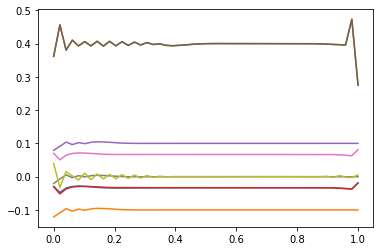

In [11]:
_, k = d0['ft_wf_traj'].shape
for i in range(k):
    plt.plot(np.linspace(0, 1, len(d0['ft_wf_traj'])), d0['ft_wf_traj'][:, i])

In [3]:
# obs = env.reset()
# current_tip_pos = env.prev_observation['observation']['tip_positions']
obj_pose = Pose.from_dict(env.prev_observation['achieved_goal'])
c_utils.get_of_from_wf(current_tip_pos, obj_pose)

array([[ 0.04404254, -0.12709241,  0.03389202],
       [-0.08708513, -0.08474551,  0.03380303],
       [ 0.02099654,  0.00797261,  0.04130636]])

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.01453273, 0.0253115 , 0.03609027, 0.04686904, 0.05764781,
        0.06842658, 0.07920535, 0.08998412, 0.10076289, 0.11154166,
        0.12232043]),
 <BarContainer object of 10 artists>)

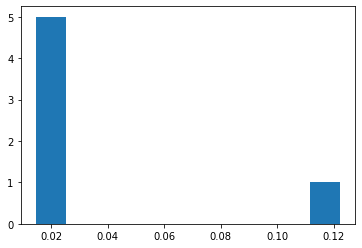

In [8]:
plt.hist([np.linalg.norm(tp - dtp) for tp, dtp in zip(tip_positions, des_tip_positions)])

(array([12.,  4., 13.,  6.,  1.,  0.,  1.,  5.,  3.,  5.]),
 array([0.01438022, 0.03261799, 0.05085577, 0.06909355, 0.08733133,
        0.10556911, 0.12380688, 0.14204466, 0.16028244, 0.17852022,
        0.196758  ]),
 <BarContainer object of 10 artists>)

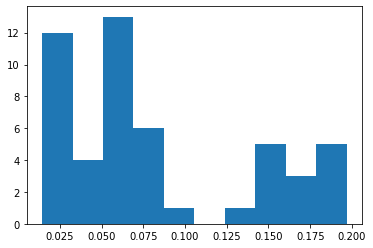

In [3]:
plt.hist([np.linalg.norm(tp - dtp) for tp, dtp in zip(tip_positions, des_tip_positions)])

(array([13.,  0.,  9., 11.,  3.,  1.,  0.,  2.,  4.,  7.]),
 array([0.01488869, 0.03052265, 0.04615661, 0.06179057, 0.07742453,
        0.09305849, 0.10869245, 0.12432641, 0.13996037, 0.15559432,
        0.17122828]),
 <BarContainer object of 10 artists>)

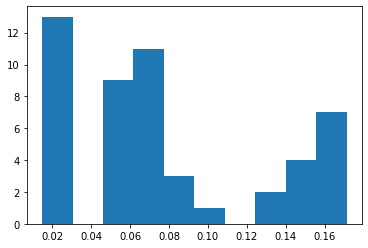

In [6]:
plt.hist([np.linalg.norm(tp - dtp) for tp, dtp in zip(tip_positions, des_tip_positions)])

(array([20.,  1.,  8.,  8.,  0.,  0.,  1.,  5.,  4.,  3.]),
 array([0.01478285, 0.03154379, 0.04830473, 0.06506568, 0.08182662,
        0.09858756, 0.1153485 , 0.13210945, 0.14887039, 0.16563133,
        0.18239227]),
 <BarContainer object of 10 artists>)

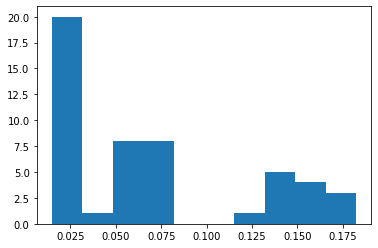

In [4]:
plt.hist([np.linalg.norm(tp - dtp) for tp, dtp in zip(tip_positions, des_tip_positions)])